In [11]:
import pandas as pd
import numpy as np
import random
from os import listdir
from os.path import isfile, join,getsize,isdir
import csv
import numpy
import cPickle as pickle
import json
from random import shuffle
import warnings
import time
#import msgpack
import re
import matplotlib.pyplot as plt
from datetime import date
import math
import pylab
import pandas_profiling
import unicodedata
import dateutil.relativedelta
#n'affiche pas les warnings
warnings.filterwarnings('ignore')
#affiche la totalité des colonnes du dataframe
pd.set_option('display.max_columns', None)
#path = "C:\Users\Data Science 5\Desktop\L_equipe"

## Chargement fichiers

In [8]:
path = "W:\L_equipe\dataframes\\"
dftrain = pd.read_pickle(path+"\dataframe_ready_to_use.pkl")
dftrain = pd.read_pickle(path+"\dataframe_ready_to_use_300_300.pkl")
dftrain.drop(["subscriber","theme_souscription"], axis=1, inplace =True)
dftest = pd.read_pickle(path+"\dataframe_test_300_300.pkl")
dftest.drop(["subscriber","theme_souscription"], axis=1, inplace =True)
dftest.drop('id_client', axis=1, inplace = True)

## Profiling

In [15]:
pandas_profiling.ProfileReport(dftrain)

Number of variables,89
Number of observations,799
Total Missing (%),0.0%
Total size in memory,555.6 KiB
Average record size in memory,712.1 B
Numeric,83
Categorical,0
Date,0
Text (Unique),0
Rejected,6
Distinct count,390


### Shuffle

In [9]:
dftrain.drop('id_client', axis=1, inplace = True)
dftrain = dftrain.reindex(np.random.permutation(dftrain.index))

## Apprentissage

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import VotingClassifier

X = dftrain.copy()
X.drop("abo_juin", axis=1, inplace=True)
Y = dftrain.abo_juin

### Grid Search

In [30]:
#tuned_parameters = {"n_estimators" : [1000],
#                    "max_features" : ["auto","sqrt"],
#                    "max_depth": [None,3,10,15,20],
#                    "random_state" : [None,50],
#                    "min_samples_leaf": [10,20,30,50,60,70],
#                    "min_samples_split" : [2,5,10,15],
#                    "oob_score" : [True, False],
#                  "bootstrap": [True]}
#
#model = RandomForestClassifier(n_jobs=-1)
## ----------------------------------------------------#
#tuned_parameters = {"n_estimators" : [1000],#,1000,10000],"criterion" : ["gini", "entropy"],
#                    "max_features" : ["auto","sqrt",0.3,0.5,0.2,0.1],
#                    "max_depth": [None,3,10],
#                    "random_state" : [None,50],
#                    "min_samples_leaf": [10,20,30],
#                    "min_samples_split" : [2,5,10]}
#                    #"oob_score" : [True, False]}
#
#model = ExtraTreesClassifier(n_jobs=-1)
# ----------------------------------------------------#
#tuned_parameters = {"learning_rate":[0.1],
#                    "n_estimators" : [1000],
#                    "max_features" : ["sqrt",0.3,0.2,0.1,0.5,0.7],
#                    "max_depth": [None,3,10],
#                    "random_state" : [None,10],
#                    "min_samples_leaf": [10,20],
#                     "min_samples_split" : [2,3,5,10]}
#                    #"oob_score" : [True, False]}
#    
#model = GradientBoostingClassifier()
# ----------------------------------------------------#
#tuned_parameters = {'max_iter' : [1000000],
#                    'tol' : [5.52e-6, 5.58e-6, 5e-5, 5.5e-6, 5.2e-6, 5.4e-6, 5.55e-6],
#                    "random_state" : [None, 10],
#                    "dual": [False]}
#
#model = LinearSVC()
# ----------------------------------------------------#
tuned_parameters = {'kernel':['linear'],
                    "C" : [5e-5,1e-4,5e-3,5e-4,7e-4,1e-5,1e-6],
                    "max_iter" :[10e6, 10e5],
                   "random_state" : [None,10]}

model = SVC()
# ----------------------------------------------------#
#tuned_parameters = {}
#
#model = GaussianNB()
# ----------------------------------------------------#
#tuned_parameters = {"max_iter":[500,1000,600,400],
#                   "tol" : [1e-3, 1e-4,1e-5,2e-5, 9e-4]}
#
#model = LogisticRegression()
# ----------------------------------------------------#

gs = GridSearchCV(model, tuned_parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
gs.fit(X, Y)

minavgscore = 0
minparams = 0

for params, avgscore, scores in gs.grid_scores_ :
    if avgscore > minavgscore :
        minavgscore = avgscore
        minparams = params

print minavgscore, minparams

0.925 {'kernel': 'linear', 'C': 5e-05, 'max_iter': 10000000.0, 'random_state': None}


In [11]:
# -- Random Forest
model1 = RandomForestClassifier(oob_score=True, bootstrap=True, min_samples_leaf=10, n_estimators=100,
                               random_state=None, max_features='auto', max_depth=None)
#0.966165413534 {'oob_score': True, 'bootstrap': True, 'min_samples_leaf': 20, 'n_estimators': 1000,
#                'min_samples_split': 5, 'random_state': None, 'max_features': 'sqrt', 'max_depth': None}

# -- ExtraTrees
model2 = ExtraTreesClassifier(max_features=0.3, n_estimators=1000,random_state=None, max_depth=3,min_samples_leaf=10,
                             min_samples_split = 10)
#0.96365914787 {'min_samples_leaf': 10, 'n_estimators': 1000, 'min_samples_split': 10,
#                'random_state': None, 'max_features': 0.3, 'max_depth': 3}

# -- Gradient Boosting
model3 = GradientBoostingClassifier(loss='deviance', learning_rate= 0.1, min_samples_leaf= 20, n_estimators= 1000,
                                   random_state= 10, max_features= 0.3, max_depth= 10, min_samples_split=2)
#0.97619047619
#0.979949874687 {'learning_rate': 0.1, 'min_samples_leaf': 10, 'n_estimators': 1000,
#'min_samples_split': 2, 'random_state': None, 'max_features': 0.2, 'max_depth': None}
#300_300
#0.986666666667 {'learning_rate': 0.1, 'min_samples_leaf': 20, 'n_estimators': 1000, 'min_samples_split': 2,
# 'random_state': 10, 'max_features': 0.3, 'max_depth': 10}

# --linear SVM
model4 = LinearSVC(max_iter=100000, random_state=None, tol=5.2e-6, dual=False)
#0.961152882206 {'max_iter': 10000, 'random_state': None, 'tol': 1e-06, 'dual': False}
#0.967418546366 {'max_iter': 100000, 'random_state': None, 'tol': 5.52e-06, 'dual': False}

# --GaussianNB
model5 = GaussianNB()
#0.894736842105 {}

# -- LogisticRegression
model6 = LogisticRegression(max_iter=500,tol=1e-05)
#0.959899749373 {'max_iter': 500, 'tol': 1e-05}

#--Ensemble models
modele1 = VotingClassifier(estimators = [('gb', model3),('rf', model1)
                                        ,('lr', model6)])

modele2 = VotingClassifier(estimators = [('gb', model3),('rf', model1)
                                        ,('lr', model6),('nb', model5),('et', model2)])#,('svm', model4),(

tuned_parameters = {"voting" : ["soft","hard"]}
                    #,"weights" : [[1,1],[2,1],[3,1],[1,2],[1,3]]}
                    #"weights" : [[1,1,1], [2,1,1],[3,2,1],[3,1,1],[3,1,2]]}
                    #"weights": [[1,1,1,1], [2,1,1,1],[3,2,1,1],[3,1,1,1], [3,2,1,2]]}


# ----------------------------------------------------#
dic_model={"model1":["rf",model1, {}],"model2":["et",model2,{}],"model3":["gb",model3,{}]
           ,"model4":["svm",model4,{}],"model5":["nb",model5,{}],"model6":["lr",model6,{}]
           ,"modele1":["gb+rf+lr",modele1,{"voting" : ["soft","hard"],
                                                   "weights" : [None,[1,1,1],[2,1,1],[3,1,2],[1,2,3],[3,1,1]]}]
           ,"modele2":["full",modele2,{"voting" : ["soft","hard"],
                                               "weights" : [None,[1,1,1,1,1],[6,3,3,4,1],[5,1,1,1,1],
                                                            [6,3,1,3,4],[5,2,1,2,2],[4,2,1,2,2]]}]}

for i in dic_model.keys():
    tuned_parameters = dic_model[i][2]
    gs = GridSearchCV(dic_model[i][1], tuned_parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
    gs.fit(X, Y)

    minavgscore = 0
    minparams = 0

    for params, avgscore, scores in gs.grid_scores_ :
        if avgscore > minavgscore :
            minavgscore = avgscore
            minparams = params

    print dic_model[i][0],minavgscore, minparams,gs.scoring

gb+rf+lr 0.975 {'voting': 'hard', 'weights': [3, 1, 1]} accuracy
gb 0.975 {} accuracy
et 0.955 {} accuracy
rf 0.961666666667 {} accuracy
full 0.975 {'voting': 'hard', 'weights': [5, 1, 1, 1, 1]} accuracy
lr 0.958333333333 {} accuracy
nb 0.871666666667 {} accuracy
svm 0.963333333333 {} accuracy


### Fit

In [12]:
#model = VotingClassifier(estimators = [('gb', model3)])#,('rf', model1),('lr', model6)],voting='soft', weights=[3,1,1])
dic_model["modele1"][1] =VotingClassifier(estimators = [('gb', model3),('rf', model1)
                                        ,('lr', model6)], weights=[3,1,1])
dic_model["modele2"][1] = VotingClassifier(estimators = [('gb', model3),('rf', model1)
                                       ,('nb', model5),('et', model3) ,('lr', model6)]
                                      ,weights=[5,1,1,1,1])#,('svm', model4)

for i in dic_model.keys() :
    print dic_model[i][0]
    %time dic_model[i][1].fit(X,Y)

gb+rf+lr
Wall time: 1.56 s
gb
Wall time: 794 ms
et
Wall time: 3.07 s
rf
Wall time: 376 ms
full
Wall time: 2.11 s
lr
Wall time: 194 ms
nb
Wall time: 2 ms
svm
Wall time: 264 ms


## Test 

In [13]:
#test = pd.read_pickle(path+"\dataframe_final.pkl")
Xtest = dftest.copy()
y_true = dftest.abo_juin.values
Xtest.drop("abo_juin", axis=1,inplace=True)
#y_true = test.abo_juin
#test.drop(["id_client", "abo_juin", "subscriber","theme_souscription"], axis=1, inplace = True)
for i in dic_model.keys():
    y_pred = dic_model[i][1].predict(Xtest)
    print dic_model[i][0],dic_model[i][1].score(Xtest,y_true)
    #true positive : sub correctly predicted
    #false postive : sub incorrectly predicted
    #true negative : nonsub correctly predicted
    #false negative : nonsub incorrectly predicted
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for j in range(y_pred.shape[0]) :
        if y_true[j] == y_pred[j]:
            if y_true[j] == 1.0 :
                TP +=1
            else : TN+=1
        elif y_true[j] == 1.0 :
            FP+=1
        else : FN+=1
    print dic_model[i][0],"TP:",TP,"FP:",FP,"TN:",TN,"FN:",FN,"\n"

gb+rf+lr 0.973557692308
gb+rf+lr TP: 97 FP: 1 TN: 3953 FN: 109 

gb 0.973557692308
gb TP: 97 FP: 1 TN: 3953 FN: 109 

et 0.962259615385
et TP: 96 FP: 2 TN: 3907 FN: 155 

rf 0.960336538462
rf TP: 96 FP: 2 TN: 3899 FN: 163 

full 0.973557692308
full TP: 97 FP: 1 TN: 3953 FN: 109 

lr 0.956009615385
lr TP: 95 FP: 3 TN: 3882 FN: 180 

nb 0.869711538462
nb TP: 83 FP: 15 TN: 3535 FN: 527 

svm 0.957932692308
svm TP: 95 FP: 3 TN: 3890 FN: 172 



## Feature importance

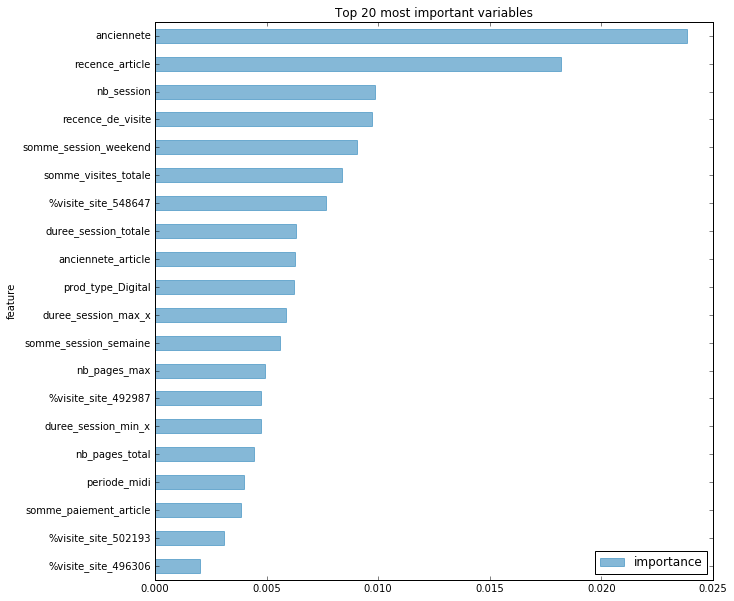

In [115]:
%matplotlib inline

feature_importances_data = []
features = X.columns
for feature_name, feature_importance in zip(features, model3.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort('importance')[-20::]\
    .plot(title='Top 20 most important variables',
          kind='barh',
          figsize=(10, 10),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)
    
plt.savefig("W:\\L_equipe\modeles\gb_98_features_importance.png")

## Test fichier Camille

In [77]:
df_cam = pd.read_csv("W:\L_Equipe\\basetot.csv", sep = ";")
df_cam = df_cam.fillna(0)

In [64]:
path = "W:\L_equipe\dataframes\\"
df_cam.cible.value_counts()
df_cam= pd.get_dummies(df_cam, columns = ['device2'], prefix ='device' )
df_cam= pd.get_dummies(df_cam, columns = ['lieu'], prefix ='lieu')
df_cam= pd.get_dummies(df_cam, columns = ['sport'], prefix ='sport')
df_cam= pd.get_dummies(df_cam, columns = ['visite'], prefix ='sport')

df_cam.drop("device", axis=1, inplace=True)
non_abo_cam = df_cam.loc[df_cam.cible == 0].sample(n=700)
abo_cam = df_cam.loc[df_cam.cible == 1].sample(700)
reste = df_cam.loc[(~df_cam.clientuserid.isin(non_abo_cam.clientuserid)& ~df_cam.clientuserid.isin(abo_cam.clientuserid))]
reste_nonabo = reste.loc[df_cam.cible == 0].sample(n = 100)
reste_abo = reste.loc[df_cam.cible ==1]
framestest = [reste_nonabo, reste_abo]
frames = [non_abo_cam,abo_cam]
dataframe_final_cam = pd.concat(frames)
dataframe_final_test_cam = pd.concat(framestest)
dataframe_final_cam.to_pickle(path+"\dataframe_ready_to_use_cam_700_700.pkl")
dataframe_final_test_cam.to_pickle(path+"\dataframe_test_cam_100_100.pkl")

In [65]:
dftrain_cam = pd.read_pickle(path+"\dataframe_ready_to_use_cam_700_700.pkl")
dftrain_cam.drop(["typologie"], axis=1, inplace =True)
dftest_cam = pd.read_pickle(path+"\dataframe_test_cam_100_100.pkl")
dftest_cam.drop(["typologie","clientuserid"], axis=1, inplace =True)

In [66]:
dftrain_cam.drop('clientuserid', axis=1, inplace = True)
dftrain_cam = dftrain_cam.reindex(np.random.permutation(dftrain_cam.index))

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import VotingClassifier

X_cam = dftrain_cam.copy()
X_cam.drop(["cible"], axis=1, inplace=True)
Y_cam = dftrain_cam.cible

In [70]:
tuned_parameters = {"max_iter":[500,1000,600,400],
                   "tol" : [1e-3, 1e-4,1e-5,2e-5, 1e-6]}

model_cam = LogisticRegression()

gs = GridSearchCV(model_cam, tuned_parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
gs.fit(X_cam, Y_cam)

minavgscore = 0
minparams = 0

for params, avgscore, scores in gs.grid_scores_ :
    if avgscore > minavgscore :
        minavgscore = avgscore
        minparams = params

print minavgscore, minparams

0.707857142857 {'max_iter': 500, 'tol': 1e-05}


In [73]:
model_cam.fit(X_cam,Y_cam)
Xtest_cam = dftest_cam.copy()
y_true_cam = dftest_cam.cible.values
Xtest_cam.drop("cible", axis=1,inplace=True)
y_pred_cam = model_cam.predict(Xtest_cam)
print model_cam.score(Xtest_cam,y_true_cam)
TP = 0
FP = 0
TN = 0
FN = 0
for j in range(y_pred_cam.shape[0]) :
    if y_true_cam[j] == y_pred_cam[j]:
        if y_true_cam[j] == 1.0 :
            TP +=1
        else : TN+=1
    elif y_true_cam[j] == 1.0 :
        FP+=1
    else : FN+=1
print "TP:",TP,"FP:",FP,"TN:",TN,"FN:",FN,"\n"

0.61214953271
TP: 52 FP: 62 TN: 79 FN: 21 

